# Maps viz

In [1]:
import folium as fl

import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
lat = 49.28
lon = -123.12
van_map = fl.Map([lat, lon], zoom_start=12, tiles='Stamen Watercolor')
van_map

# “OpenStreetMap”

# “Mapbox Bright” (Limited levels of zoom for free tiles)

# “Mapbox Control Room” (Limited levels of zoom for free tiles)

# “Stamen” (Terrain, Toner, and Watercolor)

# “Cloudmade” (Must pass API key)

# “Mapbox” (Must pass API key)

# “CartoDB” (positron and dark_matter)

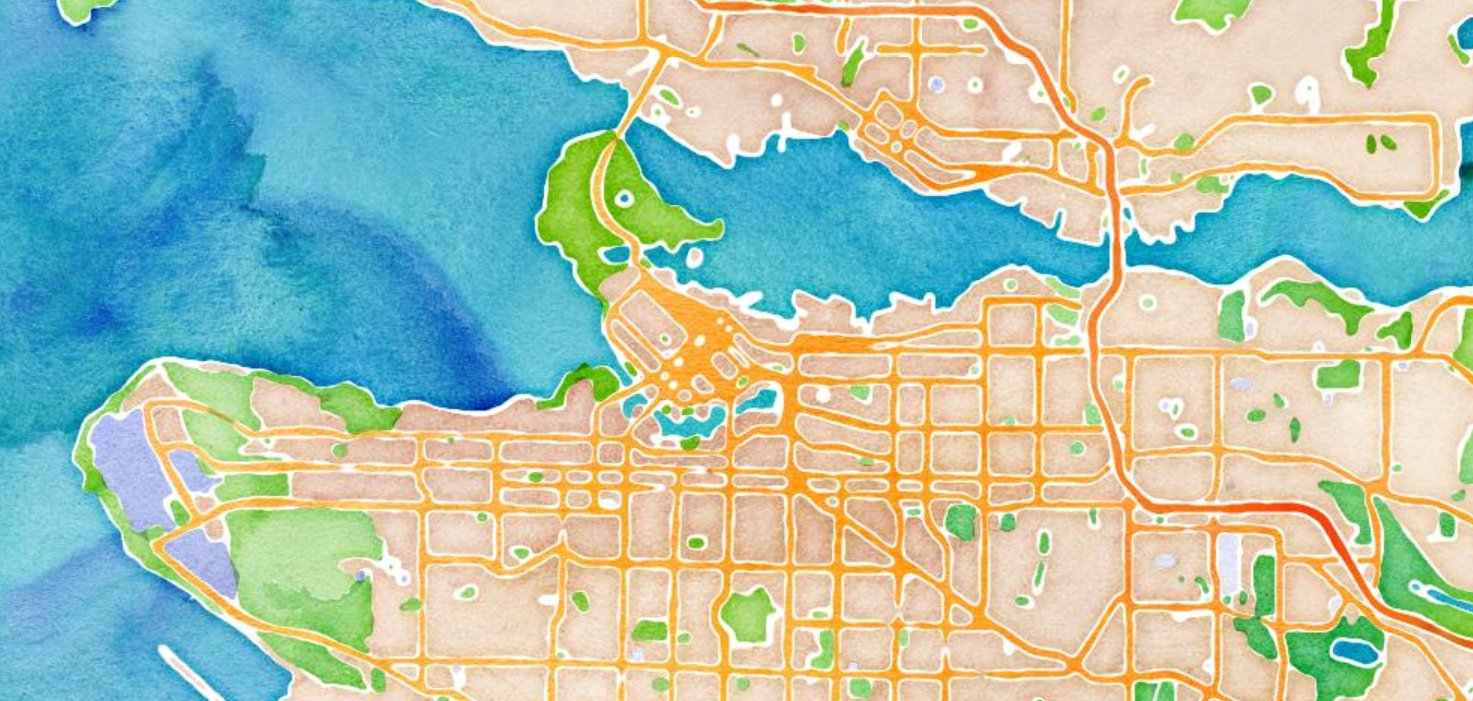

## Map the data

In [3]:
df = pd.read_csv('python_maps/shanghai_hotpot.csv')
df

name                address adname pname          type  \
0           海底捞火锅(打浦路店)           打浦路1号金玉兰广场4层    黄浦区   上海市  餐饮服务;中餐厅;火锅店   
1        三人行骨头王火锅(浙江路店)                 浙江南路8号    黄浦区   上海市  餐饮服务;中餐厅;火锅店   
2        傣妹休闲·火锅(三牌楼路店)                三牌楼路11号    黄浦区   上海市  餐饮服务;中餐厅;火锅店   
3           春秋火锅(复兴中路店)        复兴中路581号(近瑞金二路)    黄浦区   上海市  餐饮服务;中餐厅;火锅店   
4             新梅居(宁海一店)               宁海东路303号    黄浦区   上海市  餐饮服务;中餐厅;火锅店   
...                 ...                    ...    ...   ...           ...   
2505            石榴姐火锅米线   城桥镇富民街178-2号(新老板娘旁边)    崇明区   上海市  餐饮服务;中餐厅;火锅店   
2506              djhch          堡镇工农路149号传奇地锅    崇明区   上海市  餐饮服务;中餐厅;火锅店   
2507    皇家品鉴锅物料理(长兴圆沙店)  长兴镇仁建路829号302.303.304    崇明区   上海市  餐饮服务;中餐厅;火锅店   
2508                 玖巷              利民路24号3号楼    崇明区   上海市  餐饮服务;中餐厅;火锅店   
2509  伊蒙小肥羊火锅城(长兴岛壹街区店)          丰福路3号108-109室    崇明区   上海市  餐饮服务;中餐厅;火锅店   

            lat         lon  
0     31.206898  121.466603  
1     31.231981  121.477108  
2     31.226199  121.487951  
3     31.216771  121.461280  
4     31.229821  121.475336  
...         ...         ...  
2505  31.622039  121.392207  
2506  31.538902  121.616091  
2507  31.363968  121.769910  
2508  31.639520  121.400712  
2509  31.384980  121.703739  

[2510 rows x 7 columns]

In [4]:
# plt.figure(figsize=(5, 11))

sh_lat = 31.2
sh_lon = 121.5
sh_map = fl.Map([sh_lat, sh_lon], )
sh_map;

In [5]:
import matplotlib.colors as mcolors
import random
import numpy as np
colors = list(mcolors.CSS4_COLORS.keys())
random.choices(colors);

In [6]:
df_sj=df[df.adname=='松江区']
df_sj.lat.mean()

31.05790794108413

In [7]:
hotpots = fl.map.FeatureGroup()
color = np.random.choice(colors)
fill = np.random.choice(colors)
print(f"{color, fill}")
for lat, lng, in zip(df_sj.lat, df_sj.lon):
    hotpots.add_child(
        fl.CircleMarker(
            [lat, lng],
            radius=3, # define the circle marker size
            color=color,
            fill=True,
            fill_color=fill,
            fill_opacity=.4
            
            
            
        )
    )
    
sj_lat, sj_lon = (31.06, 121.25)
# put the featuregroup onto the map
sj_map = fl.Map([sj_lat, sj_lon], zoom_start=12)
hotpots.to_dict()
sj_map.add_child(hotpots)

('darkslateblue', 'goldenrod')


## Insert names to the locations

In [8]:
print(dir(fl))

['Choropleth', 'Circle', 'CircleMarker', 'ClickForMarker', 'ColorLine', 'ColorMap', 'CssLink', 'CustomIcon', 'Div', 'DivIcon', 'Element', 'FeatureGroup', 'Figure', 'FitBounds', 'GeoJson', 'GeoJsonPopup', 'GeoJsonTooltip', 'Html', 'IFrame', 'Icon', 'JavascriptLink', 'LatLngPopup', 'LayerControl', 'LinearColormap', 'Link', 'MacroElement', 'Map', 'Marker', 'PolyLine', 'Polygon', 'Popup', 'Rectangle', 'RegularPolygonMarker', 'StepColormap', 'TileLayer', 'Tooltip', 'TopoJson', 'Vega', 'VegaLite', 'WmsTileLayer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'branca', 'elements', 'features', 'folium', 'map', 'raster_layers', 'sys', 'utilities', 'vector_layers']


In [9]:
lats = list(df_sj.lat)
lons = list(df_sj.lon)
names = list(df_sj.name)
for lat, lng, name in zip(lats, lons, names):
    fl.Marker([lat, lng], tooltip = name,).add_to(sj_map)
sj_map

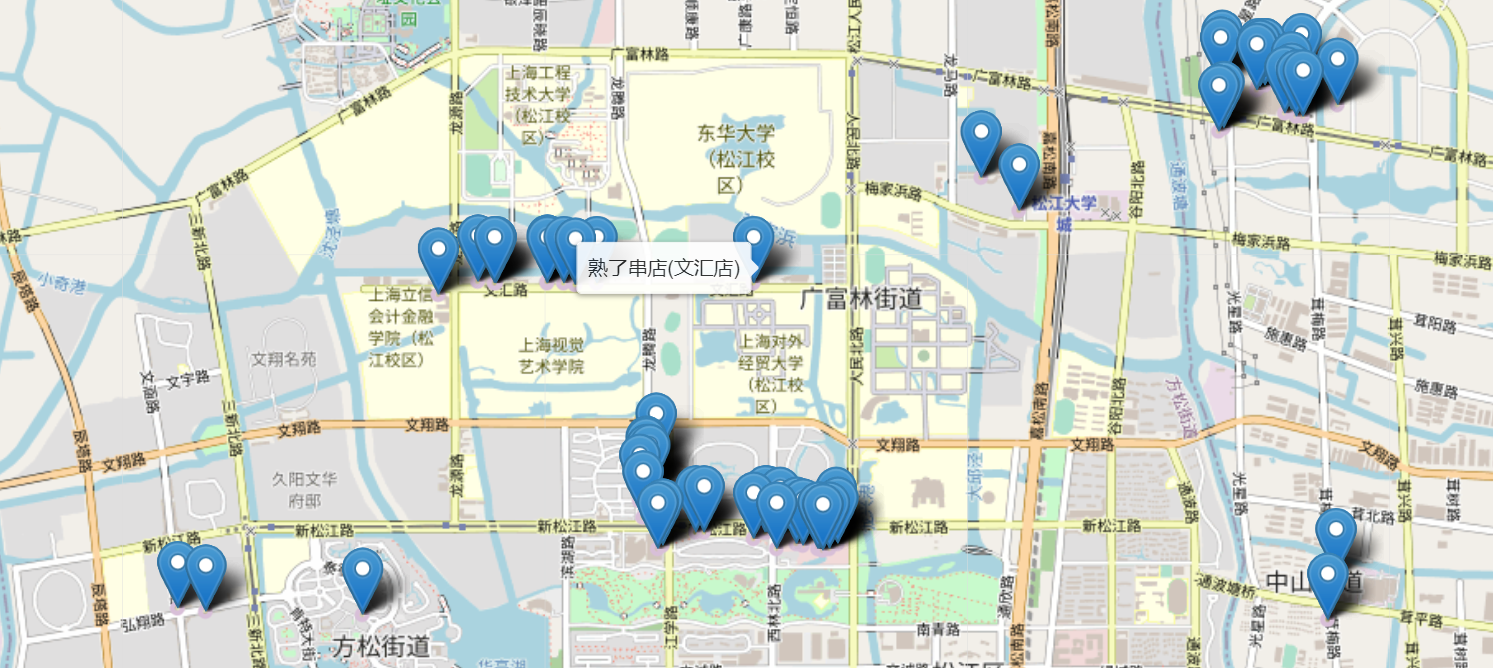

## Visualize the the counts of hotpots in available districts by choropleth map

In [41]:
import geopandas as gpd

geo_data = gpd.read_file('python_maps/shanghai.json')
geo_data

adcode  name  childrenNum     level              parent  subFeatureIndex  \
0   310101   黄浦区            0  district  {'adcode': 310000}                0   
1   310104   徐汇区            0  district  {'adcode': 310000}                1   
2   310105   长宁区            0  district  {'adcode': 310000}                2   
3   310106   静安区            0  district  {'adcode': 310000}                3   
4   310107   普陀区            0  district  {'adcode': 310000}                4   
5   310109   虹口区            0  district  {'adcode': 310000}                5   
6   310110   杨浦区            0  district  {'adcode': 310000}                6   
7   310112   闵行区            0  district  {'adcode': 310000}                7   
8   310113   宝山区            0  district  {'adcode': 310000}                8   
9   310114   嘉定区            0  district  {'adcode': 310000}                9   
10  310115  浦东新区            0  district  {'adcode': 310000}               10   
11  310116   金山区            0  district  {'adcode': 310000}               11   
12  310117   松江区            0  district  {'adcode': 310000}               12   
13  310118   青浦区            0  district  {'adcode': 310000}               13   
14  310120   奉贤区            0  district  {'adcode': 310000}               14   
15  310151   崇明区            0  district  {'adcode': 310000}               15   

                                             geometry  
0   MULTIPOLYGON (((121.47599 31.18789, 121.47494 ...  
1   MULTIPOLYGON (((121.41257 31.19112, 121.41972 ...  
2   MULTIPOLYGON (((121.43946 31.21448, 121.43746 ...  
3   MULTIPOLYGON (((121.48299 31.24192, 121.47892 ...  
4   MULTIPOLYGON (((121.35418 31.23712, 121.35605 ...  
5   MULTIPOLYGON (((121.48541 31.31157, 121.48566 ...  
6   MULTIPOLYGON (((121.51649 31.24695, 121.51600 ...  
7   MULTIPOLYGON (((121.35871 30.97786, 121.35126 ...  
8   MULTIPOLYGON (((121.42525 31.27066, 121.41950 ...  
9   MULTIPOLYGON (((121.33651 31.29490, 121.33289 ...  
10  MULTIPOLYGON (((121.57048 30.99835, 121.56796 ...  
11  MULTIPOLYGON (((120.99673 30.95031, 121.00205 ...  
12  MULTIPOLYGON (((121.32385 31.16293, 121.32722 ...  
13  MULTIPOLYGON (((121.32385 31.16293, 121.32249 ...  
14  MULTIPOLYGON (((121.57048 30.99835, 121.57675 ...  
15  MULTIPOLYGON (((121.97518 31.61703, 121.98825 ...

In [42]:
# 
hots = pd.DataFrame(df.adname.value_counts())
hots = hots.reset_index().rename(columns={'index': 'district', 'adname': 'num'})
hots.T

0    1    2    3    4    5    6    7    8    9    10   11   12  \
district  浦东新区  闵行区  松江区  嘉定区  宝山区  静安区  黄浦区  杨浦区  青浦区  徐汇区  奉贤区  普陀区  长宁区   
num        520  272  217  207  175  145  135  127  114  111  107  107  100   

           13   14   15  
district  金山区  虹口区  崇明区  
num        75   71   27

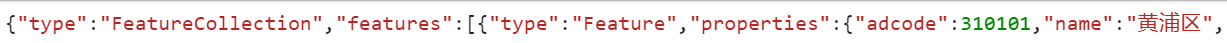

In [62]:
cms = plt.colormaps()
print(cms)

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [84]:
sh_map = fl.Map([sh_lat, sh_lon], )
fill_color = np.random.choice(cms)
print(fill_color)
fl.Choropleth(
    geo_data=geo_data,
    data=hots,
    columns=['district', 'num'],
    key_on = 'feature.properties.name',
    fill_color = fill_color,
    fill_opacity=.5,
    line_opacity=.1,
    highlight=True,
    legend_name='Hotpot Counts in SH'
    
).add_to(sh_map)

sh_map

Pastel2_r


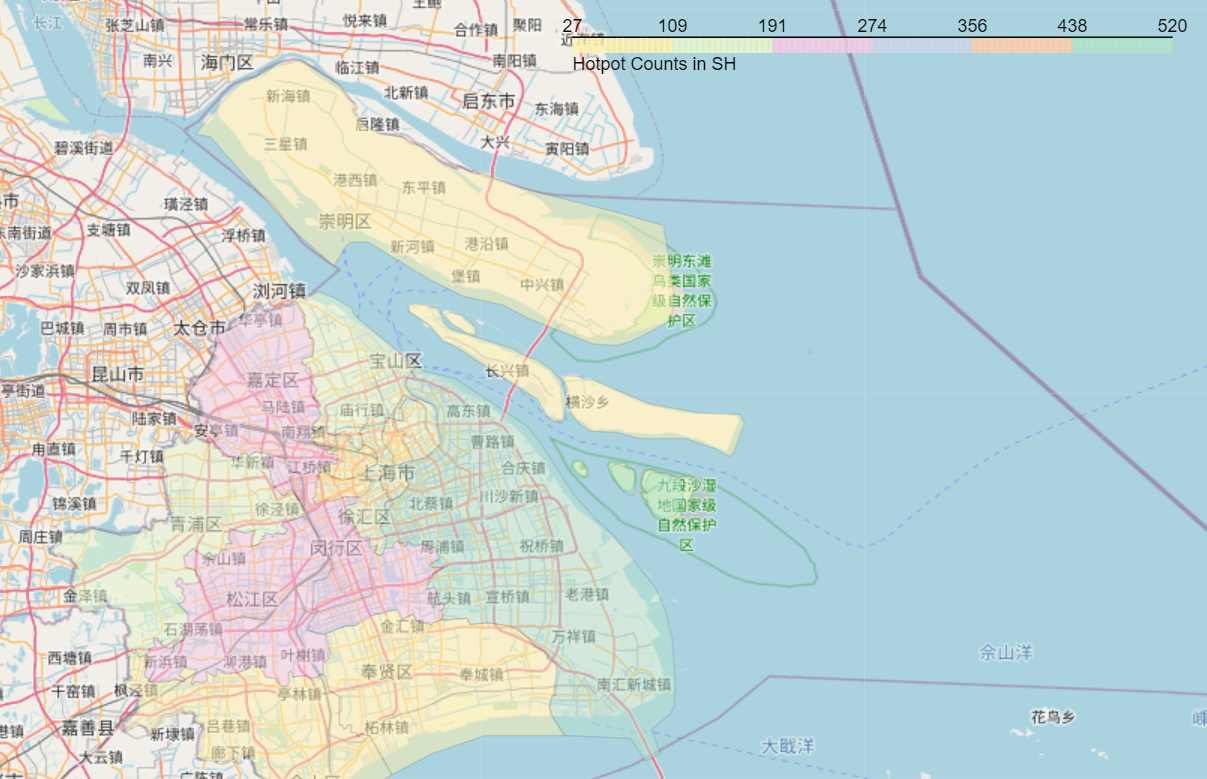

## `Plotly`

In [85]:
# TODO

## `GeoPandas` + `Matplotlib`